
___
# Recommender Systems with Python



## Importing Libraries

In [8]:
import numpy as np
import pandas as pd

## Reading the Dataset

In [9]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [10]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


# EDA




## Visualization of The Dataset

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [17]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


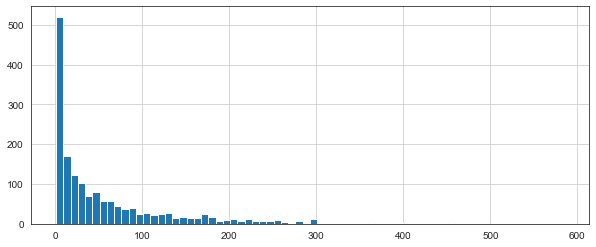

In [19]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

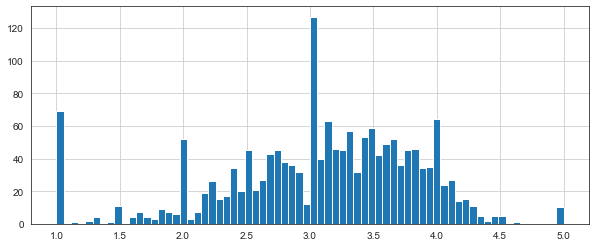

In [20]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

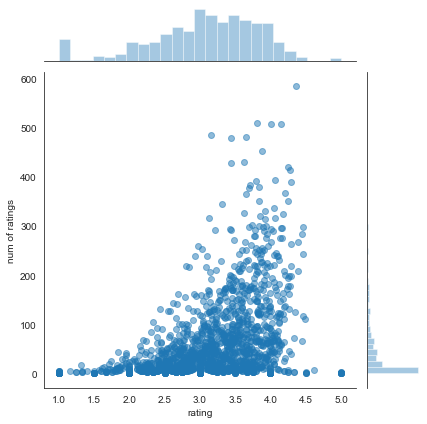

In [21]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommendation System

In [22]:
user_ratings = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
user_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Removing the movies which have less than 10 users who rated it and fill the NaN values with '0'

user_ratings = user_ratings.dropna(thresh = 10, axis = 1).fillna(0)
user_ratings.head()


title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
user_ratings.fillna(0)

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [26]:
item_similarity_df = user_ratings.corr(method = 'pearson')
item_similarity_df.head(50)

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,0.059375,-0.001026,0.052983,0.128832,0.078451,0.015592,0.005819,0.221130,0.121285,...,0.057828,0.051990,-0.034379,0.000754,0.074758,0.109125,0.155599,0.115300,0.039243,-0.005846
12 Angry Men (1957),0.059375,1.000000,-0.014261,0.066459,0.230361,0.298878,0.339260,0.174562,0.019941,0.156865,...,0.048841,0.145077,0.138377,-0.004764,0.170314,0.160215,0.290332,0.165072,0.079418,0.038188
187 (1997),-0.001026,-0.014261,1.000000,0.078831,-0.010273,-0.039807,-0.021359,-0.006205,0.127598,0.017356,...,0.085036,-0.024068,-0.020277,0.115338,-0.025753,-0.000791,-0.021764,0.006881,0.053885,0.063828
2 Days in the Valley (1996),0.052983,0.066459,0.078831,1.000000,0.056372,0.091159,-0.019876,-0.008144,0.245286,0.129326,...,0.087648,0.069056,-0.001807,-0.026960,0.028328,0.116563,0.061485,0.197710,0.176088,0.146833
"20,000 Leagues Under the Sea (1954)",0.128832,0.230361,-0.010273,0.056372,1.000000,0.384624,0.274579,0.118159,0.117611,0.231341,...,0.244146,0.130682,0.062690,-0.001689,0.101680,0.286895,0.309606,0.243381,0.058035,0.071166
2001: A Space Odyssey (1968),0.078451,0.298878,-0.039807,0.091159,0.384624,1.000000,0.266271,0.200439,0.038087,0.264959,...,0.180626,0.078785,0.113816,-0.023749,0.262839,0.183153,0.429475,0.168606,0.071820,0.065981
"39 Steps, The (1935)",0.015592,0.339260,-0.021359,-0.019876,0.274579,0.266271,1.000000,0.295996,0.040992,0.094185,...,0.077485,0.081486,0.086241,0.023298,0.127350,0.137241,0.205643,0.057215,0.025614,0.016427
8 1/2 (1963),0.005819,0.174562,-0.006205,-0.008144,0.118159,0.200439,0.295996,1.000000,0.020495,0.051115,...,0.133709,0.141899,0.165365,-0.018517,0.094995,0.041049,0.170755,0.035554,0.022211,0.074089
Absolute Power (1997),0.221130,0.019941,0.127598,0.245286,0.117611,0.038087,0.040992,0.020495,1.000000,0.142961,...,0.128968,0.066216,-0.038573,-0.018503,0.038708,0.121870,0.100284,0.136724,0.135485,0.042312


In [27]:
def get_similar_movies(movie_name, user_ratings):
    similar_score = item_similarity_df[movie_name]*(user_ratings-2.5)
    similar_score = similar_score.sort_values(ascending = False)
    return(similar_score)


In [28]:
user_1 = [("39 Steps, The (1935)", 3), ("Star Wars (1977)", 4), ("Liar Liar (1997)", 5)]

similar_movies = pd.DataFrame()

for movie,rating in user_1:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating), ignore_index = True)

similar_movies.head()
similar_movies.sum().sort_values(ascending = False)

Liar Liar (1997)                               2.537835
Star Wars (1977)                               1.670425
Return of the Jedi (1983)                      1.366651
Toy Story (1995)                               1.055259
Independence Day (ID4) (1996)                  0.968061
                                                 ...   
Raise the Red Lantern (1991)                  -0.249452
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)   -0.261735
Oscar & Lucinda (1997)                        -0.262226
Sweet Hereafter, The (1997)                   -0.268945
Wings of the Dove, The (1997)                 -0.299039
Length: 1144, dtype: float64